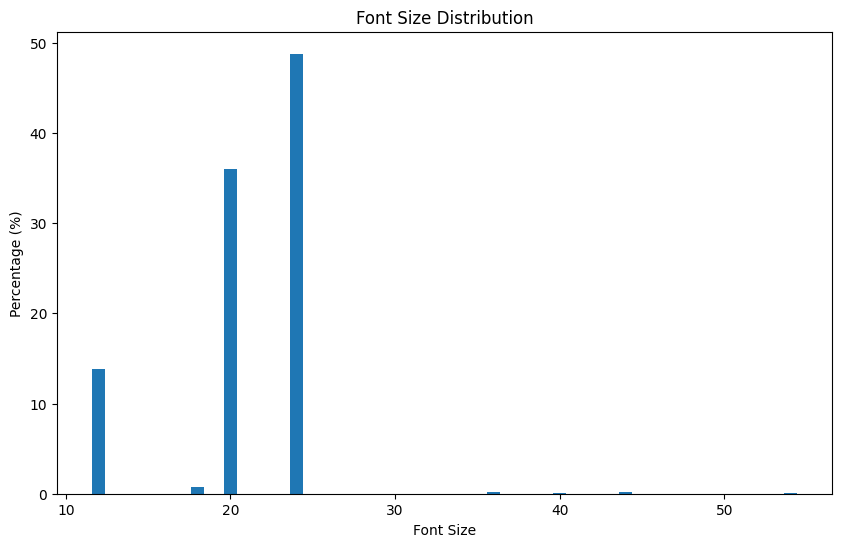

In [15]:
import pdfplumber
from collections import Counter
import matplotlib.pyplot as plt

def get_font_size_percentages(pdf_path, decimal_places=2):
    font_sizes = []

    try:
        with pdfplumber.open(pdf_path) as pdf:
            total_chars = 0

            for page in pdf.pages:
                for char in page.chars:
                    font_size = round(char['size'])
                    font_sizes.append(font_size)
                    total_chars += 1

        font_size_counts = Counter(font_sizes)
        font_size_percentages = {size: count / total_chars * 100 for size, count in font_size_counts.items()}
        return font_size_percentages
    except pdfplumber.PDFSyntaxError as e:
        print(f"Error opening or parsing the PDF: {e}")
        return None

def plot_font_size_distribution(font_size_percentages):
    if font_size_percentages is not None:
        font_sizes, percentages = zip(*font_size_percentages.items())
        plt.figure(figsize=(10, 6))
        plt.bar(font_sizes, percentages)
        plt.xlabel('Font Size')
        plt.ylabel('Percentage (%)')
        plt.title('Font Size Distribution')
        plt.show()

pdf_path = 'pdf1.pdf'
font_size_percentages = get_font_size_percentages(pdf_path)
plot_font_size_distribution(font_size_percentages)



In [14]:
!pip install pdfplumber